In [74]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## We will grab training, testing and validaiton essays and prepare them to fine-tune a Masked LM Distilbert

In [75]:
training_path = './AES.nosync/_Kaggle AES Dataset/_Datasets/training set essay 2.xls'
test_path = './AES.nosync/_Kaggle AES Dataset/_Datasets/test set essay 2.xlsx'
valid_path = './AES.nosync/_Kaggle AES Dataset/_Datasets/valid set essay 2.xlsx'

In [76]:
essays = pd.DataFrame()

In [77]:
valid_data = pd.read_excel(valid_path)
valid_data.head()

,valid_set,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
1,4778,2,"Do u believe there are books, music, magizines...",6578,6579
2,4779,2,I strongly believe that there are some materia...,6580,6581
3,4780,2,"Do you think that certain books, movies, magaz...",6582,6583
4,4781,2,Censorship in libraries should definetly be al...,6584,6585


In [78]:
essays['essay'] = pd.Series(valid_data['Unnamed: 2'].values)
essays.drop(0, inplace=True)
essays.head()

,essay
1,"Do u believe there are books, music, magizines..."
2,I strongly believe that there are some materia...
3,"Do you think that certain books, movies, magaz..."
4,Censorship in libraries should definetly be al...
5,Many books are helpful as you @MONTH1 know by ...


In [79]:
train_data = pd.read_excel(training_path)
train_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,2978,2,Certain materials being removed from libraries...,4,4,NaN,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2979,2,Write a persuasive essay to a newspaper reflec...,1,2,NaN,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2980,2,Do you think that libraries should remove cert...,2,3,NaN,2,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2981,2,"In @DATE1's world, there are many things found...",4,4,NaN,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2982,2,In life you have the 'offensive things'. The l...,4,4,NaN,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
essays = essays.append(train_data.filter(['essay']))
essays.count()

essay    2400
dtype: int64

In [81]:
test_data = pd.read_excel(test_path)
test_data.head()

,test_set,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
1,5378,2,I think people should take books off the shelf...,7778,7779
2,5379,2,Whil I belive that they should remove some boo...,7780,7781
3,5380,2,"Removing all books, music, movies, and magazin...",7782,7783
4,5381,2,Censorship in libraries should be limited to a...,7784,7785


In [82]:
test_data.drop(0, inplace=True)
test_data.rename(columns={'Unnamed: 2': 'essay'}, inplace=True)
essays = essays.append(test_data.filter(['essay']))
initial_count = essays.count()
print(initial_count)

essay    3000
dtype: int64



        Min: 130
        Max: 6098
        Average: 2083.502
    


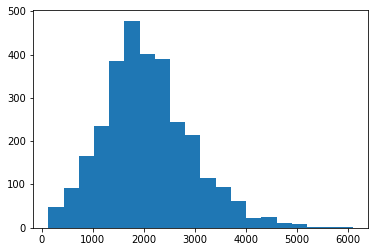

In [83]:
# Check min, max and average length of essays
def get_lengths(df: pd.DataFrame):
    max = 0
    min = 9999
    all_lengths = []
    for row in essays.iterrows():
        length = len(row[1]['essay'])
        if length < min:
            min = length
        if length > max:
            max = length
        all_lengths.append(length)

    print(f"""
        Min: {min}
        Max: {max}
        Average: {np.average(all_lengths)}
    """)
    plt.hist(all_lengths, bins=20)
    plt.show()

    return all_lengths

lengths = get_lengths(essays)

### It looks like most essays length between 1000 and 3000. Let's verify that

In [84]:
length_map = {}
step = 250

for i in range(0, 7000, step):
    key = f"{i}-{i + step - 1}"
    length_map[key] = 0
    for l in lengths:
        if l >= i and l < i + step:
            length_map[key] += 1

print(json.dumps(length_map, indent=2))

{
  "0-249": 15,
  "250-499": 51,
  "500-749": 82,
  "750-999": 144,
  "1000-1249": 177,
  "1250-1499": 284,
  "1500-1749": 383,
  "1750-1999": 378,
  "2000-2249": 332,
  "2250-2499": 331,
  "2500-2749": 210,
  "2750-2999": 180,
  "3000-3249": 143,
  "3250-3499": 80,
  "3500-3749": 79,
  "3750-3999": 51,
  "4000-4249": 22,
  "4250-4499": 24,
  "4500-4749": 11,
  "4750-4999": 9,
  "5000-5249": 8,
  "5250-5499": 1,
  "5500-5749": 2,
  "5750-5999": 2,
  "6000-6249": 1,
  "6250-6499": 0,
  "6500-6749": 0,
  "6750-6999": 0
}


### Actually looks like there are a lot between 750 and 3250. Let's take those essays for usage and remove the rest.

In [88]:
min_length = 750
max_length = 3250

for row in essays.iterrows():
    length = len(row[1]['essay'])
    if length < min_length or length > max_length:
        essays.drop(row[0], inplace=True)

final_count = essays.count()

print(f"""
    Removed essays: {initial_count[0] - final_count[0]}
    (from {initial_count[0]} to {final_count[0]})
    """
)


    Removed essays: 856
    (from 3000 to 2144)
    



        Min: 753
        Max: 3241
        Average: 1978.3120335820895
    


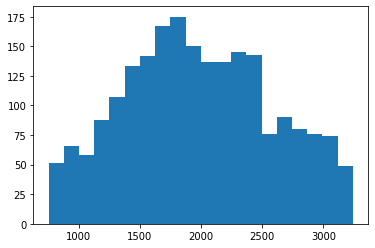

In [90]:
_ = get_lengths(essays)

In [91]:
# Ok. Let's save the dataset locally to use for fine tuning
file_name = 'essays_for_mlm_tuning.csv'
essays.to_csv(file_name, index=False)

In [92]:
# Just checking if it was saved correctly
essays = pd.read_csv(file_name)
essays.count()

essay    2144
dtype: int64

In [101]:
essays["essay"][0].lower().split()

['do',
 'u',
 'believe',
 'there',
 'are',
 'books,',
 'music,',
 'magizines,',
 'and',
 'movies',
 'in',
 'are',
 'libaries?',
 'these',
 'meterials',
 'could',
 'consist',
 'of',
 'nude',
 'pictures',
 'and',
 'so',
 'on.',
 'most',
 'parents',
 'do',
 'not',
 'want',
 'to',
 'see',
 'there',
 'kids',
 'getting',
 'a',
 'hold',
 'of',
 'this',
 'type',
 'of',
 'material.',
 'you',
 'maybe',
 'think',
 "'what",
 'could',
 'we',
 'do',
 'about',
 'this',
 'things,',
 'or',
 'least',
 'come',
 'to',
 'a',
 'compermise',
 'to',
 'make',
 'almost',
 'everyone',
 'happy.',
 'i',
 'have',
 'so',
 'reasons',
 'why',
 'we',
 'should',
 'put',
 'this',
 'type',
 'of',
 'material',
 'away',
 'from',
 'kids',
 'sight',
 'and',
 'reach.',
 'first',
 'of',
 'all,',
 'the',
 'books',
 'and',
 'magizines',
 'that',
 'have',
 'any',
 'nude',
 'in',
 'them,',
 'should',
 'have',
 'their',
 'own',
 'section',
 'and,',
 'be',
 'labled',
 'aduts',
 'only.',
 'i',
 'know',
 'this',
 'might',
 'be',
 'alot

### (Legacy) Prepare for AES

In [ ]:
def prepare_dataset(df):
    # Add score column and remove all the others
    df['final_score'] = df['domain1_score'] + df['domain2_score']
    df.drop('essay_set', axis=1, inplace=True)
    df.drop('essay_id', axis=1, inplace=True)
    df.drop('domain1_score', axis=1, inplace=True)
    df.drop('domain2_score', axis=1, inplace=True)
    for rater in range(1, 4):
        df.drop('rater{}_domain1'.format(rater), axis=1, inplace=True)
        if rater != 3:
            df.drop('rater{}_domain2'.format(rater), axis=1, inplace=True)
        for trait in range(1, 7):
            df.drop('rater{}_trait{}'.format(rater, trait), axis=1, inplace=True)
    
    return df

df = prepare_dataset(train_data)
# Certify there are no null values
print(df.isnull().any())
initial_counts = df.count()
print(initial_counts)